<a href="https://colab.research.google.com/github/corderobot/Kaggle_HousePrices/blob/master/NNs/HousePrices_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset
Dataset fue previamente procesado utilizando R. El dataset set limpio está subido a git en un archivo .csv llamado "clean.csv".
Dicho archivo es utilizado para entrenar/probar las redes neuronales

## Extracting

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/train.csv')

## Getting to know the New Dataset

In [3]:
dataset.columns
#dataset.drop(dataset.columns[0])
target = dataset['SalePrice']
dataset = dataset.drop(columns=['Id', 'SalePrice'])
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1458,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0

### NA Analysis

LotFrontage  has total of NaNs:		 259 	out of:	 1460
Alley  has total of NaNs:		 1369 	out of:	 1460
MasVnrType  has total of NaNs:		 8 	out of:	 1460
MasVnrArea  has total of NaNs:		 8 	out of:	 1460
BsmtQual  has total of NaNs:		 37 	out of:	 1460
BsmtCond  has total of NaNs:		 37 	out of:	 1460
BsmtExposure  has total of NaNs:		 38 	out of:	 1460
BsmtFinType1  has total of NaNs:		 37 	out of:	 1460
BsmtFinType2  has total of NaNs:		 38 	out of:	 1460
Electrical  has total of NaNs:		 1 	out of:	 1460
FireplaceQu  has total of NaNs:		 690 	out of:	 1460
GarageType  has total of NaNs:		 81 	out of:	 1460
GarageYrBlt  has total of NaNs:		 81 	out of:	 1460
GarageFinish  has total of NaNs:		 81 	out of:	 1460
GarageQual  has total of NaNs:		 81 	out of:	 1460
GarageCond  has total of NaNs:		 81 	out of:	 1460
PoolQC  has total of NaNs:		 1453 	out of:	 1460
Fence  has total of NaNs:		 1179 	out of:	 1460
MiscFeature  has total of NaNs:		 1406 	out of:	 1460


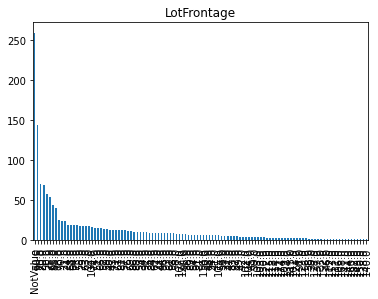

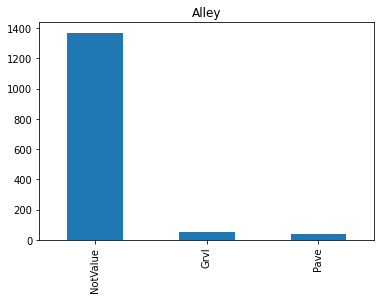

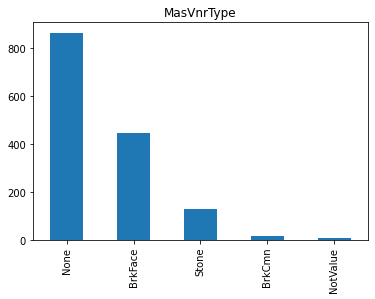

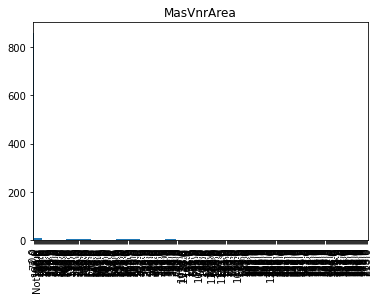

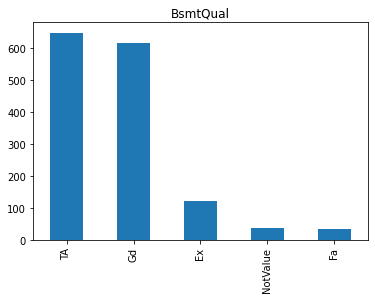

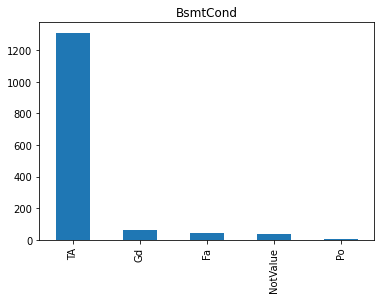

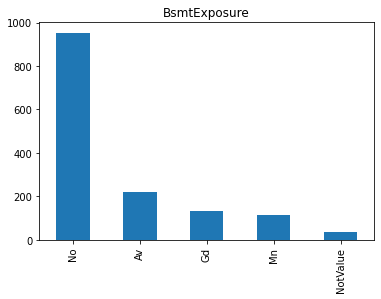

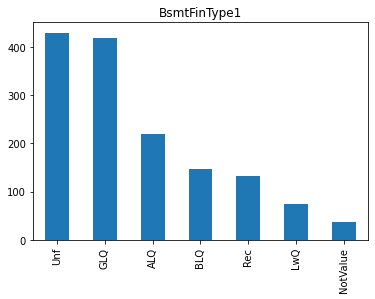

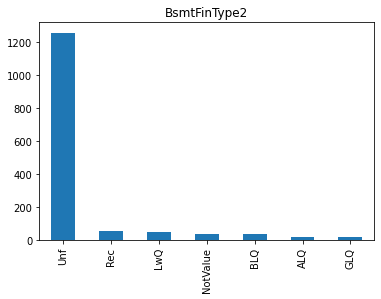

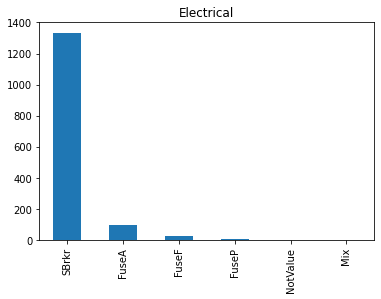

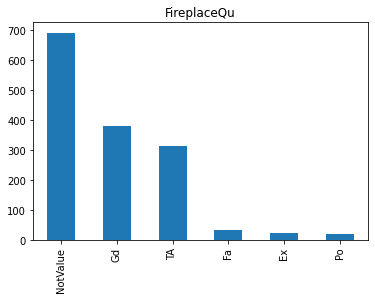

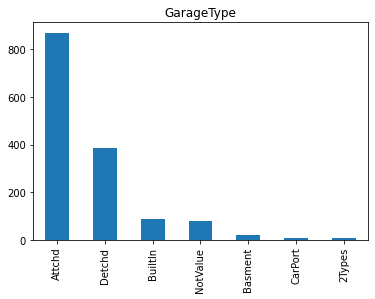

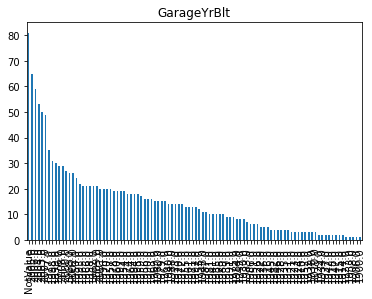

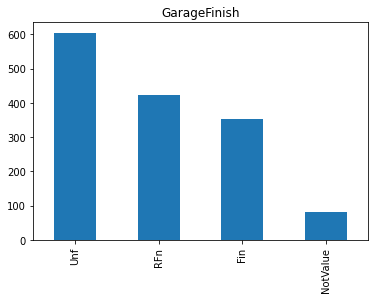

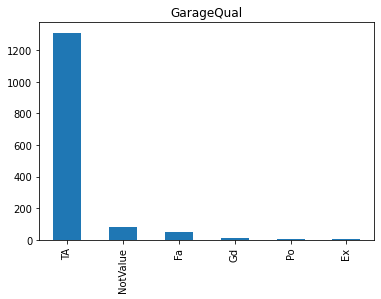

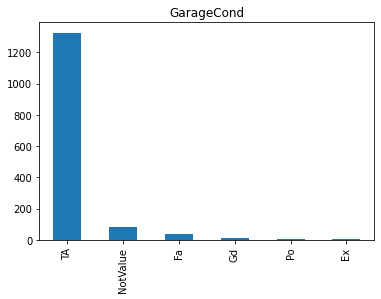

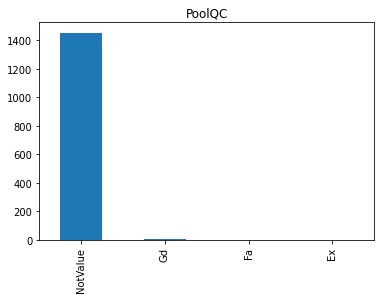

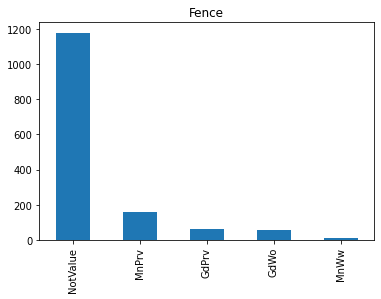

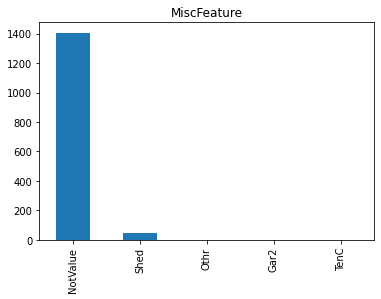

In [4]:
for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature, " has total of NaNs:\t\t", dataset[feature].isnull().sum(), "\tout of:\t", dataset.shape[0])
    fig, ax = plt.subplots()
    ax.set_title(feature)
    dataset[feature].replace(float('NaN'), 'NotValue').value_counts().plot(ax=ax, kind='bar')
    #print(feature, "\t",dataset[feature].isnull().sum(), "\t out of:\t", dataset[feature].shape[0])

## Encoding


### Integer Encoding

In [0]:
# Function to Integer Encode

def integer_encode(ds, toEncode):
  ds[toEncode[0]] = ds[toEncode[0]].map({'Grvl': 0, 'Pave': 1})
  ds[toEncode[1]] = ds[toEncode[1]].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 0})
  ds[toEncode[2]] = ds[toEncode[2]].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 0})
  ds[toEncode[3]] = ds[toEncode[3]].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
  ds[toEncode[4]] = ds[toEncode[4]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[5]] = ds[toEncode[5]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[6]] = ds[toEncode[6]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[7]] = ds[toEncode[7]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[8]] = ds[toEncode[8]].map({float('NaN'): 0, 'No': 1,'Mn': 2, 'Av': 3, 'Gd': 4})
  ds[toEncode[9]] = ds[toEncode[9]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
  ds[toEncode[10]] = ds[toEncode[10]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
  ds[toEncode[11]] = ds[toEncode[11]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[12]] = ds[toEncode[12]].map({'N': 0, 'Y': 1})
  ds[toEncode[13]] = ds[toEncode[13]].map({float('NaN'): 1, 'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5})
  ds[toEncode[14]] = ds[toEncode[14]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[15]] = ds[toEncode[15]].map({float('NaN'): 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})
  ds[toEncode[16]] = ds[toEncode[16]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[17]] = ds[toEncode[17]].map({float('NaN'): 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
  ds[toEncode[18]] = ds[toEncode[18]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[19]] = ds[toEncode[19]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[20]] = ds[toEncode[20]].map({'N': 0, 'P': 1,'Y': 2})
  ds[toEncode[21]] = ds[toEncode[21]].map({float('NaN'): 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[22]] = ds[toEncode[22]].map({float('NaN'): 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})


In [6]:
toIntegerEncode = ['Street', 'LotShape', 'Utilities', 'LandSlope',
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                   'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive', 'PoolQC', 'Fence'
                   ]

integer_encode(dataset, toIntegerEncode)

dataset[toIntegerEncode].isnull().any()

Street          False
LotShape        False
Utilities       False
LandSlope       False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
HeatingQC       False
CentralAir      False
Electrical      False
KitchenQual     False
Functional      False
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PavedDrive      False
PoolQC          False
Fence           False
dtype: bool

### One Hot Encoding

In [0]:
# Function to One Hot Encode

def one_hot_encoding(ds, toEncode):
  for feature in toOneHotEncode:
    ds = pd.concat([ds,pd.get_dummies(ds[feature], prefix=feature)],axis=1)
  ds = ds.drop(columns=toOneHotEncode)
  return ds


In [8]:
toOneHotEncode = ['MSZoning', 'Alley', 'LandContour', 'LotConfig',
                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                  'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                  'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
                  ]



dataset = one_hot_encoding(dataset, toOneHotEncode)

dataset = pd.concat([dataset, target], axis = 1)
dataset

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,1,0,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,1,856,854,0,1710,1,0,2,1,3,1,3,8,8,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,1,0,0,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,8,1,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,1,2,0,0,7,5,2001,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,1,920,866,0,1786,1,0,2,1,3,1,3,6,8,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,1,2,0,0,7,5,1915,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,1,961,756,0,1717,1,0,1,0,3,1,3,7,8,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,1,2,0,0,8,5,2000,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,8,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,85.0,13175,1,0,0,0,6,6,1978,1988,119.0,2,2,4,3,1,5,790,3,163,589,1542,2,1,1,2073,0,0,2073,1,0,2,0,3,1,2,7,7,2,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,210000
1456,70,66.0,9042,1,0,0,0,7,9,1941,2006,0.0,4,3,3,4,1,6,275,1,0,877,1152,4,1,1,1188,1152,0,2340,0,0,2,0,4,1,3,9,8,2,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,266500
1457,20,68.0,9717,1,0,0,0,5,6,1950,1996,0.0,2,2,3,3,2,6,49,3,1029,0,1078,3,1,2,1078,0,0,1078,1,0,1,0,2,1,3,5,8,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,142125
1458,20,75.0,9937,1,0,0,0,5,6,1965,1965,0.0,3,2,3,3,1,4,830,2,290,136,1256,3,1,1,1256,0,0,1256,1,0,1,1,3,1,2,6,8,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,147500


## Finishing Details

In [9]:
for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature)

LotFrontage
MasVnrArea
GarageYrBlt


In [0]:
# Cleaning Test first
meanTraining = dataset.mean()

# Cleaning LotFrontage
dataset['LotFrontage'] = dataset['LotFrontage'].replace(float('NaN'), meanTraining['LotFrontage'])

# Cleaning MasVnrArea
dataset['MasVnrArea'] = dataset['MasVnrArea'].replace(float('NaN'), meanTraining['MasVnrArea'])

# Cleaning GarageYrBlt
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].replace(float('NaN'), meanTraining['GarageYrBlt'])

for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature)

## Correlation Heat Map

In [0]:
corr = dataset.corr()
#plt.figure(figsize=(70, 70))
#sns.heatmap(corr, vmin=-0.5, vmax=0.5, square = True, cmap='viridis')

## Extracting Important Features


In [12]:
corr['SalePrice']

MSSubClass              -0.084284
LotFrontage              0.334901
LotArea                  0.263843
Street                   0.041036
LotShape                 0.246798
                           ...   
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
SalePrice                1.000000
Name: SalePrice, Length: 217, dtype: float64

In [13]:
importantFeatures = []
th = 0.50
thresholdP = th
thresholdN = -1 * th
features = dataset.columns
corIndex = 0
for corFeat in corr['SalePrice']:
  if corFeat >= thresholdP or corFeat <= thresholdN:
    importantFeatures.append(features[corIndex])
  corIndex += 1

importantFeatures

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'SalePrice']

## Constructing new Dataset

In [14]:
datasetClean = dataset[importantFeatures]
datasetClean

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageArea,SalePrice
0,7,2003,2003,3,4,856,856,1710,2,3,8,0,2,2,548,208500
1,6,1976,1976,2,4,1262,1262,1262,2,2,6,3,2,2,460,181500
2,7,2001,2002,3,4,920,920,1786,2,3,6,3,2,2,608,223500
3,7,1915,1970,2,3,756,961,1717,1,3,7,4,1,3,642,140000
4,8,2000,2000,3,4,1145,1145,2198,2,3,9,3,2,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1978,1988,2,4,1542,2073,2073,2,2,7,3,1,2,500,210000
1456,7,1941,2006,4,3,1152,1188,2340,2,3,9,4,2,1,252,266500
1457,5,1950,1996,2,3,1078,1078,1078,1,3,5,0,1,1,240,142125
1458,5,1965,1965,3,3,1256,1256,1256,1,2,6,0,3,1,276,147500


## Removing Anomalies

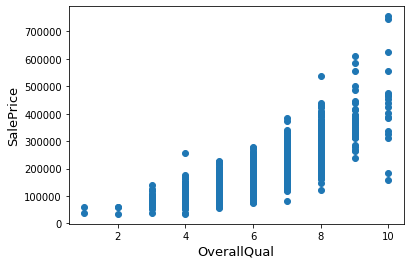

<Figure size 3600x3600 with 0 Axes>

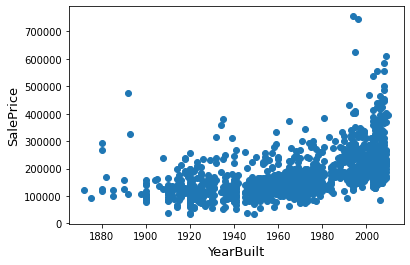

<Figure size 3600x3600 with 0 Axes>

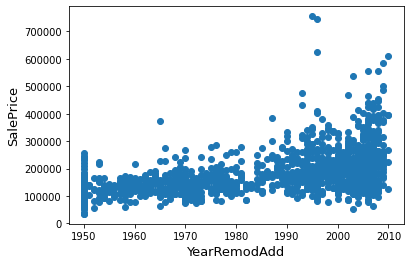

<Figure size 3600x3600 with 0 Axes>

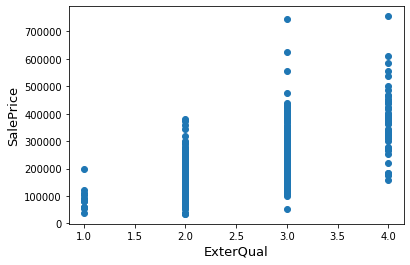

<Figure size 3600x3600 with 0 Axes>

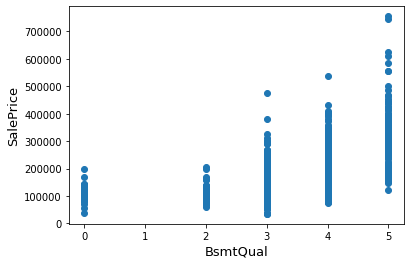

<Figure size 3600x3600 with 0 Axes>

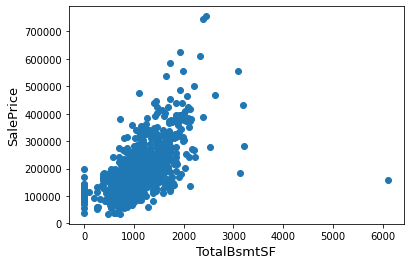

<Figure size 3600x3600 with 0 Axes>

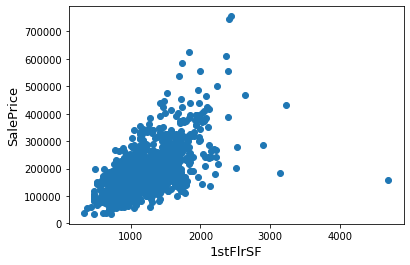

<Figure size 3600x3600 with 0 Axes>

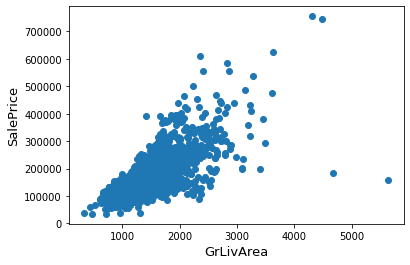

<Figure size 3600x3600 with 0 Axes>

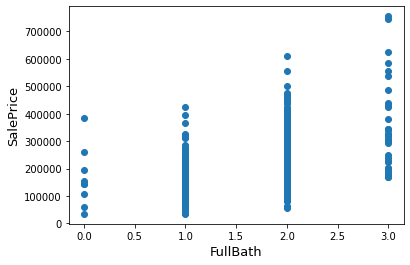

<Figure size 3600x3600 with 0 Axes>

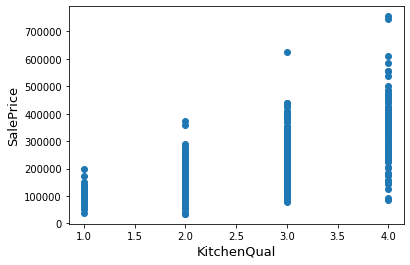

<Figure size 3600x3600 with 0 Axes>

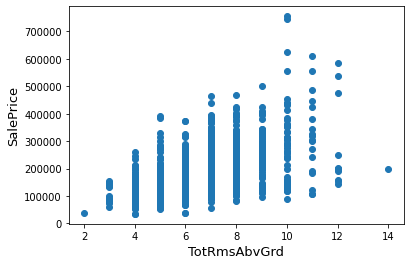

<Figure size 3600x3600 with 0 Axes>

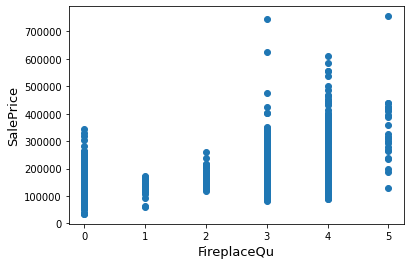

<Figure size 3600x3600 with 0 Axes>

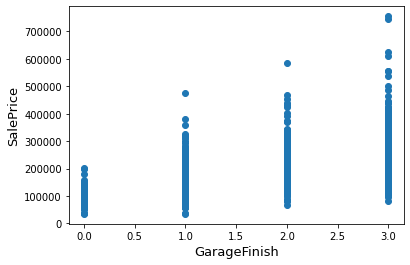

<Figure size 3600x3600 with 0 Axes>

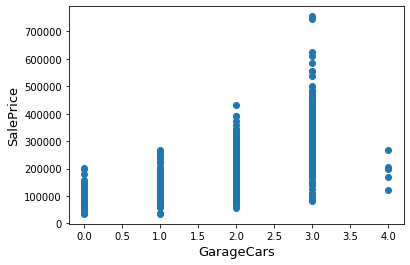

<Figure size 3600x3600 with 0 Axes>

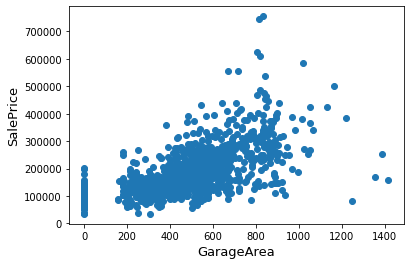

<Figure size 3600x3600 with 0 Axes>

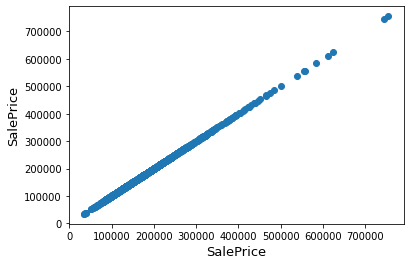

<Figure size 3600x3600 with 0 Axes>

In [21]:
for col in datasetClean.columns:
  fig, ax = plt.subplots()
  ax.scatter(datasetClean[col], datasetClean['SalePrice'])
  plt.ylabel('SalePrice', fontsize=13)
  plt.xlabel(col, fontsize=13)
  plt.figure(figsize=(50,50))
  plt.show()


## Normalizing

In [0]:
notToNormalize = ['SalePrice']

def normalize_dataset(ds, exceptAtr):
  for col in ds.columns:
    if col not in exceptAtr:
      maxi = ds[col].max()
      mini = ds[col].min()
      ds[col] = (ds[col] - mini)/(maxi-mini)

normalize_dataset(datasetClean, notToNormalize)
datasetClean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageArea,SalePrice
0,0.666667,0.949275,0.883333,0.666667,0.8,0.140098,0.119780,0.259231,0.666667,0.666667,0.500000,0.0,0.666667,0.50,0.386460,208500
1,0.555556,0.753623,0.433333,0.333333,0.8,0.206547,0.212942,0.174830,0.666667,0.333333,0.333333,0.6,0.666667,0.50,0.324401,181500
2,0.666667,0.934783,0.866667,0.666667,0.8,0.150573,0.134465,0.273549,0.666667,0.666667,0.333333,0.6,0.666667,0.50,0.428773,223500
3,0.666667,0.311594,0.333333,0.333333,0.6,0.123732,0.143873,0.260550,0.333333,0.666667,0.416667,0.8,0.333333,0.75,0.452750,140000
4,0.777778,0.927536,0.833333,0.666667,0.8,0.187398,0.186095,0.351168,0.666667,0.666667,0.583333,0.6,0.666667,0.75,0.589563,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.768116,0.633333,0.333333,0.8,0.252373,0.399036,0.327619,0.666667,0.333333,0.416667,0.6,0.333333,0.50,0.352609,210000
1456,0.666667,0.500000,0.933333,1.000000,0.6,0.188543,0.195961,0.377920,0.666667,0.666667,0.583333,0.8,0.666667,0.25,0.177715,266500
1457,0.444444,0.565217,0.766667,0.333333,0.6,0.176432,0.170721,0.140166,0.333333,0.666667,0.250000,0.0,0.333333,0.25,0.169252,142125
1458,0.444444,0.673913,0.250000,0.666667,0.6,0.205565,0.211565,0.173700,0.333333,0.333333,0.333333,0.0,1.000000,0.25,0.194640,147500


## Partitioning
Se utilizará como criterio: 80% para entrenamiento y 20% para Test 

In [0]:
# Training
dataTrain = datasetClean.sample(frac = 0.8)
trainPredictions = dataTrain["SalePrice"]
dataTrain = dataTrain.drop(columns=['SalePrice'])

# Test
dataTest = datasetClean.drop(dataTrain.index)
testPredictions = dataTest["SalePrice"]
dataTest = dataTest.drop(columns=['SalePrice'])

# Modelo

## Useful Functions

### Callback

In [0]:
# checkpoint
model_path = "/content/drive/My Drive/IO/Version1/Project/Normalized14/"
filepath = model_path + "saved_model.pb"
checkpoint_callback = ModelCheckpoint(filepath, monitor='mae', verbose=1, save_best_only=True, mode='min',save_freq='epoch')

# callbacks
callbacks_list = [checkpoint_callback]

## Model Defintion and Training

In [0]:
epochs = 500
inputShape = dataTrain.shape[1]

# Training
model = Sequential([
      Dense(128, kernel_initializer='he_normal', activation='relu', input_shape=(inputShape,)),
      Dense(128, kernel_initializer='he_normal', activation='relu'),
      Dense(128, kernel_initializer='he_normal', activation='relu'),
      Dense(128, kernel_initializer='he_normal', activation='relu'),
      Dense(128, kernel_initializer='he_normal', activation='relu'),
      #Dropout(0.3),
      Dense(128, kernel_initializer='he_normal', activation='linear'),
      #Dropout(0.3),
      Dense(1)
  ])

model.compile(loss='mae', optimizer='rmsprop', metrics=['mae'])


model.fit(dataTrain,
          trainPredictions,
          epochs=epochs,
          #validation_data=validation_split,
          batch_size = 64 ,
          validation_split=0.2,
          callbacks=callbacks_list
        )
# Evaluation
#evaluation = evaluate_model(model, dataTest, testPredictions)
#evaluation

Epoch 1/500
 1/15 [=>............................] - ETA: 0s - loss: 175577.5938 - mae: 175577.5938
Epoch 00001: mae improved from inf to 180163.07812, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized13/saved_model.pb
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized13/saved_model.pb/assets
15/15 [==============================] - 1s 58ms/step - loss: 179953.7969 - mae: 180163.0781 - val_loss: 176719.6875 - val_mae: 175938.8594
Epoch 2/500
 1/15 [=>............................] - ETA: 0s - loss: 180777.9531 - mae: 180777.9531
Epoch 00002: mae improved from 180163.07812 to 157761.18750, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized13/saved_model.pb
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized13/saved_model.pb/assets
15/15 [==============================] - 1s 52ms/step - loss: 156812.5781 - mae: 157761.1875 - val_loss: 105909.5781 - val_mae: 105175.3984
Epo

### Extract Best Model

In [0]:
# model_path = "/content/drive/My Drive/IO/Version1/Project/Normalized1/saved_model.pb"
model = tf.keras.models.load_model(filepath)

model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe9f22bc128>>

## Evaluate Model

In [0]:
model.evaluate(dataTest, testPredictions)

10/10 [==============================] - 0s 1ms/step - loss: 20429.4434 - mean_absolute_error: 20881.5312


[20429.443359375, 20881.53125]

# Kaggle Predictions

In [0]:
try:
    importantFeatures.remove('Id')
except:
    0+0
#importantFeatures

In [0]:
importantFeatures.append('Id')
#importantFeatures.remove('Id')
try:
  importantFeatures.remove('SalePrice')
except:
  0
#importantFeatures

## Cleaning test Dataset

In [0]:
# https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv
test = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv')

# Integer Encoding
integer_encode(test, toIntegerEncode)

# One Hot Encoding
test = one_hot_encoding(test, toOneHotEncode)

# Extracting important features
test = test[importantFeatures]

# Extracting IDs column
Ids = []
Ids = test['Id']
test = test.drop(columns=['Id'])

# Show
test, Ids

(      OverallQual  YearBuilt  ...  GarageCars  GarageArea
 0               5       1961  ...         1.0       730.0
 1               6       1958  ...         1.0       312.0
 2               5       1997  ...         2.0       482.0
 3               6       1998  ...         2.0       470.0
 4               8       1992  ...         2.0       506.0
 ...           ...        ...  ...         ...         ...
 1454            4       1970  ...         0.0         0.0
 1455            4       1970  ...         1.0       286.0
 1456            5       1960  ...         2.0       576.0
 1457            5       1992  ...         0.0         0.0
 1458            7       1993  ...         3.0       650.0
 
 [1459 rows x 15 columns], 0       1461
 1       1462
 2       1463
 3       1464
 4       1465
         ... 
 1454    2915
 1455    2916
 1456    2917
 1457    2918
 1458    2919
 Name: Id, Length: 1459, dtype: int64)

In [0]:
test.isnull().any(), test.dtypes

(OverallQual     False
 YearBuilt       False
 YearRemodAdd    False
 ExterQual       False
 BsmtQual        False
 TotalBsmtSF      True
 1stFlrSF        False
 GrLivArea       False
 FullBath        False
 KitchenQual      True
 TotRmsAbvGrd    False
 FireplaceQu     False
 GarageFinish    False
 GarageCars       True
 GarageArea       True
 dtype: bool, OverallQual       int64
 YearBuilt         int64
 YearRemodAdd      int64
 ExterQual         int64
 BsmtQual          int64
 TotalBsmtSF     float64
 1stFlrSF          int64
 GrLivArea         int64
 FullBath          int64
 KitchenQual     float64
 TotRmsAbvGrd      int64
 FireplaceQu       int64
 GarageFinish      int64
 GarageCars      float64
 GarageArea      float64
 dtype: object)

In [0]:
# Cleaning Test first
meanTest = test.mean()

# Replacing (in numeric features) NaN for the mean
for feature in test.columns:
  if test[feature].isnull().any():
    test[feature] = test[feature].replace(float('NaN'), meanTest[feature])

# Normalizing
normalize_dataset(test, [])

test.isnull().any()

OverallQual     False
YearBuilt       False
YearRemodAdd    False
ExterQual       False
BsmtQual        False
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
KitchenQual     False
TotRmsAbvGrd    False
FireplaceQu     False
GarageFinish    False
GarageCars      False
GarageArea      False
dtype: bool

## Predicciones del Modelo

In [0]:
predictions = model.predict(test)

## Submission

In [0]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':Ids,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
  return my_submission

make_submission(predictions[:,0],'submission_NN')

A submission file has been made


,Id,SalePrice
0,1461,131957.453125
1,1462,161340.296875
2,1463,169848.421875
3,1464,177495.890625
4,1465,189247.078125
...,...,...
1454,2915,80991.445312
1455,2916,95418.109375
1456,2917,156087.359375
1457,2918,112915.703125


# Records


Model - Loss - Kaggle Score
1.   Normalized1 - 17771.123046875 - 0.15551 - Opt: Adam, Threshold: 0.35

500 Epochs, 5 hidden layers of 128 neurons
2.   Normalized2 - 17151.228515625 - 0.1681

3.   Normalized3 - 17639.880859375 - 0.17178

4.   Normalized4 - 17156.552734375 - 0.17931

5.   Normalized5 - 17947.76171875 - 0.18730

6.   Normalized6 - 19629.109375 - 0.17973

7.   Normalized7 - 19229.9921875 - 0.20853

8.   Normalized8 - 14605.458984375 - 0.18978 - Opt: Adamax

9.   Normalized9 - 15420.509765625 - 0.22819

10.  Normalized10 - 14976.8720703125 - 0.15598 - Threshold: 0.5 - 5 Hidden layers of 128 NNs

11.  Normalized11 - Better than Normalized 11 (Same parameters)

12.  Normalized13 - 20429.443359375 - 0.16699 - initialization = "he_normal"